In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import random

dataset = pd.read_csv('ParisHousingClass.csv')
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [2]:
# выведем размер и тип данных
print(dataset.shape)
print(dataset.dtypes)

(10000, 18)
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object


In [3]:
# отбор числовых колонок
df = dataset
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['squareMeters' 'numberOfRooms' 'hasYard' 'hasPool' 'floors' 'cityCode'
 'cityPartRange' 'numPrevOwners' 'made' 'isNewBuilt' 'hasStormProtector'
 'basement' 'attic' 'garage' 'hasStorageRoom' 'hasGuestRoom' 'price']


In [4]:
 # отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['category']


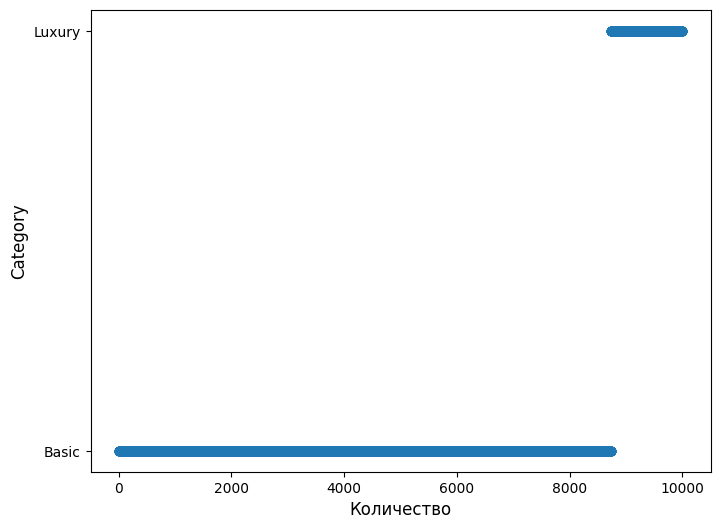

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.category.values))
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

In [6]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [7]:
df.isnull().sum() * 100 / df.shape[0]

squareMeters         0.0
numberOfRooms        0.0
hasYard              0.0
hasPool              0.0
floors               0.0
cityCode             0.0
cityPartRange        0.0
numPrevOwners        0.0
made                 0.0
isNewBuilt           0.0
hasStormProtector    0.0
basement             0.0
attic                0.0
garage               0.0
hasStorageRoom       0.0
hasGuestRoom         0.0
price                0.0
category             0.0
dtype: float64

# Пропущенных данных нет

In [8]:
df = dataset
corrupt = df['category'].replace('Luxury', np.NaN)
corrupt_built = df['isNewBuilt'].replace(0, np.NaN)
df_corrupt = df
df_corrupt['category'] = corrupt
df_corrupt['isNewBuilt'] = corrupt_built
df_corrupt

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,NaN,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1.0,0,3653,2436,128,1,2,8085989.5,NaN
2,55712,58,0,1,19,34457,6,8,2021,NaN,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,NaN,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1.0,0,8435,2429,292,1,4,7055052.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,NaN,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,NaN,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1.0,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,NaN,1,2590,6174,339,1,4,5905107.0,Basic


In [9]:
# выведем размер и тип данных
print(df_corrupt.shape)
print(df_corrupt.dtypes)

(10000, 18)
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt           float64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
category              object
dtype: object


In [10]:
df_corrupt.isnull().sum() * 100 / df_corrupt.shape[0]

squareMeters          0.00
numberOfRooms         0.00
hasYard               0.00
hasPool               0.00
floors                0.00
cityCode              0.00
cityPartRange         0.00
numPrevOwners         0.00
made                  0.00
isNewBuilt           50.09
hasStormProtector     0.00
basement              0.00
attic                 0.00
garage                0.00
hasStorageRoom        0.00
hasGuestRoom          0.00
price                 0.00
category             12.65
dtype: float64

In [11]:
# убираем все некорректные данные
df_del = df_corrupt.dropna()
df_del

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
7,86929,100,1,0,11,98155,3,4,2003,1.0,0,6326,4748,654,0,10,8696869.3,Basic
8,51522,3,0,0,61,9047,8,3,2012,1.0,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1.0,1,5198,5342,591,1,3,3970892.1,Basic
10,23563,21,0,1,90,91058,6,8,1993,1.0,0,703,852,684,1,10,2366397.3,Basic
11,96470,74,1,0,21,92029,4,2,2011,1.0,1,5414,1172,716,1,9,9652258.1,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,96173,12,1,0,36,36812,7,7,2015,1.0,1,837,3716,564,0,9,9623811.5,Basic
9992,33545,55,0,1,79,8288,1,2,2006,1.0,0,3480,4046,946,1,6,3361070.6,Basic
9993,341,83,0,0,8,1960,4,4,1993,1.0,1,2366,4016,229,1,5,35371.3,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1.0,1,8304,7730,345,1,9,8390030.5,Basic


In [12]:
# убираем колонку с некорректными данными
cols_to_drop = ['isNewBuilt']
df_less_isNewBuilt = df_del.drop(cols_to_drop, axis=1)
df_less_isNewBuilt

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
7,86929,100,1,0,11,98155,3,4,2003,0,6326,4748,654,0,10,8696869.3,Basic
8,51522,3,0,0,61,9047,8,3,2012,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1,5198,5342,591,1,3,3970892.1,Basic
10,23563,21,0,1,90,91058,6,8,1993,0,703,852,684,1,10,2366397.3,Basic
11,96470,74,1,0,21,92029,4,2,2011,1,5414,1172,716,1,9,9652258.1,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,96173,12,1,0,36,36812,7,7,2015,1,837,3716,564,0,9,9623811.5,Basic
9992,33545,55,0,1,79,8288,1,2,2006,0,3480,4046,946,1,6,3361070.6,Basic
9993,341,83,0,0,8,1960,4,4,1993,1,2366,4016,229,1,5,35371.3,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,8304,7730,345,1,9,8390030.5,Basic


In [13]:
# заполняем пропуски
med = df_corrupt['isNewBuilt'].median()
print(med)
df_fill = df_corrupt['isNewBuilt'].fillna(med)
df_f = df_corrupt
df_f['isNewBuilt'] = df_fill
df_f

1.0


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,1.0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1.0,0,3653,2436,128,1,2,8085989.5,NaN
2,55712,58,0,1,19,34457,6,8,2021,1.0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,1.0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1.0,0,8435,2429,292,1,4,7055052.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,1.0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,1.0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1.0,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,1.0,1,2590,6174,339,1,4,5905107.0,Basic


In [14]:

df_f.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,1.0,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.0,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,1.0,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,1.0,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,1.0,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.0,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.0,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [15]:
# заполняем пропущенные данные
cols_drop = ['isNewBuilt']
df_corrupt = df_corrupt.drop(columns=cols_drop)
#df_corrupt['category'] = pd.Categorical(df_corrupt['category'], categories=['Basic', 'Luxury'], ordered=True).codes

# Одномерное восстановление признаков
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_corrupt)
df_fill1 = pd.DataFrame(imputer.transform(df_corrupt.loc[:,:]), columns = df_corrupt.columns)
df_fill1

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,0,3653,2436,128,1,2,8085989.5,Basic
2,55712,58,0,1,19,34457,6,8,2021,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,0,8435,2429,292,1,4,7055052.0,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,1,2590,6174,339,1,4,5905107.0,Basic


In [16]:
df_fill1.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000.0,10000
unique,9483,100,2,2,100,9509,10,10,32,2,6352,6267,901,2,11,10000.0,1
top,47831,54,1,0,97,97260,8,4,1992,0,2192,3127,253,1,2,7559081.5,Basic
freq,3,129,5087,5032,126,3,1035,1043,356,5001,6,7,24,5030,942,1.0,10000


In [17]:
# Многомерное восстановление признаков
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_fill1['category'] = pd.Categorical(df_fill1['category'], categories=['Basic', 'Luxury'], ordered=True).codes

imp = IterativeImputer(max_iter=10, random_state=0)
# Настраиваем алгоритм обучения
imp = imp.fit(df_fill1)
#преобразуем матрицу к формату dataframe
df_fill1 = pd.DataFrame(imp.transform(df_fill1.loc[:,:]), columns = df_fill1.columns)

df_fill1.round(2)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523.0,3.0,0.0,1.0,63.0,9373.0,3.0,8.0,2005.0,1.0,4313.0,9005.0,956.0,0.0,7.0,7559081.5,0.0
1,80771.0,39.0,1.0,1.0,98.0,39381.0,8.0,6.0,2015.0,0.0,3653.0,2436.0,128.0,1.0,2.0,8085989.5,0.0
2,55712.0,58.0,0.0,1.0,19.0,34457.0,6.0,8.0,2021.0,0.0,2937.0,8852.0,135.0,1.0,9.0,5574642.1,0.0
3,32316.0,47.0,0.0,0.0,6.0,27939.0,10.0,4.0,2012.0,1.0,659.0,7141.0,359.0,0.0,3.0,3232561.2,0.0
4,70429.0,19.0,1.0,1.0,90.0,38045.0,3.0,7.0,1990.0,0.0,8435.0,2429.0,292.0,1.0,4.0,7055052.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726.0,89.0,0.0,1.0,5.0,73133.0,7.0,6.0,2009.0,1.0,9311.0,1698.0,218.0,0.0,4.0,176425.9,0.0
9996,44403.0,29.0,1.0,1.0,12.0,34606.0,9.0,4.0,1990.0,1.0,9061.0,1742.0,230.0,0.0,0.0,4448474.0,0.0
9997,83841.0,3.0,0.0,0.0,69.0,80933.0,10.0,10.0,2005.0,1.0,8304.0,7730.0,345.0,1.0,9.0,8390030.5,0.0
9998,59036.0,70.0,0.0,0.0,96.0,55856.0,1.0,3.0,2010.0,1.0,2590.0,6174.0,339.0,1.0,4.0,5905107.0,0.0


<Axes: >

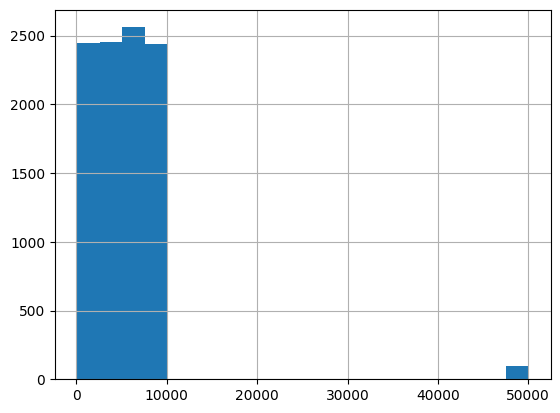

In [18]:
deleted = df_fill1
deleted['basement'] = deleted['basement'].apply(lambda x: 50000 if x < 100 else x)
deleted['basement'].hist(bins=20)

In [19]:
deleted.columns.values

array(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made',
       'hasStormProtector', 'basement', 'attic', 'garage',
       'hasStorageRoom', 'hasGuestRoom', 'price', 'category'],
      dtype=object)

<Axes: >

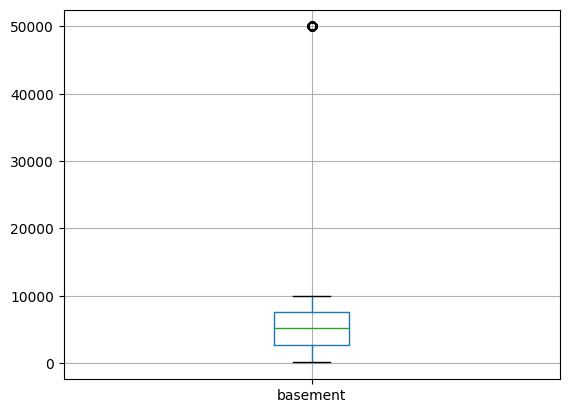

In [20]:
deleted.boxplot(column=['basement'])

In [21]:
def clean_by(df, column):
    mean, std = df[column].mean(), df[column].std()
    cleaned_df = df[(df[column] < mean + 3 * std) & (df[column] > mean - 3 * std)]
    return cleaned_df

(9901, 17)


<Axes: >

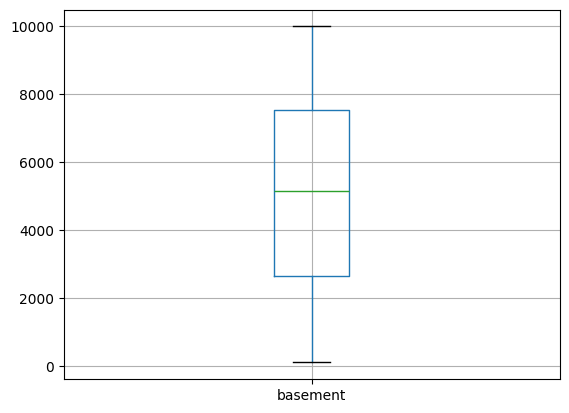

In [22]:
# очищаем
deleted = df_fill1
columns = ['basement']
for col in columns:
    deleted = clean_by(deleted, col)

print(deleted.shape)
deleted.boxplot(column=['basement'])

## Неинформативные признаки

In [23]:
# выявляем неинформативные признаки

num_rows = len(df_corrupt.index)
low_information_cols = []

for col in df_corrupt.columns:
    cnts = df_corrupt[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    print(col, top_pct*100)

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print(col)

print("low_inf_cols", low_information_cols)

squareMeters 0.03
numberOfRooms 1.29
hasYard 50.870000000000005
hasPool 50.32
floors 1.26
cityCode 0.03
cityPartRange 10.35
numPrevOwners 10.43
made 3.56
hasStormProtector 50.01
basement 0.06
attic 0.06999999999999999
garage 0.24
hasStorageRoom 50.3
hasGuestRoom 9.42
price 0.01
category 87.35000000000001
low_inf_cols []


In [24]:
# выявление наиболее распространенных комбинаций значений и их удаление
key = ['squareMeters', 'price', 'category']
df_new_del = df_del
df_new_del.fillna(-999).groupby(key)['category'].count().sort_values(ascending=False).head(20)

df_dedupped2 = df_new_del.drop_duplicates(subset=key)

print(df_new_del.shape)
print(df_dedupped2.shape)
df_dedupped2

(3726, 18)
(3726, 18)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
7,86929,100,1,0,11,98155,3,4,2003,1.0,0,6326,4748,654,0,10,8696869.3,Basic
8,51522,3,0,0,61,9047,8,3,2012,1.0,1,632,5792,807,1,5,5154055.2,Basic
9,39686,42,0,0,15,71019,5,8,2021,1.0,1,5198,5342,591,1,3,3970892.1,Basic
10,23563,21,0,1,90,91058,6,8,1993,1.0,0,703,852,684,1,10,2366397.3,Basic
11,96470,74,1,0,21,92029,4,2,2011,1.0,1,5414,1172,716,1,9,9652258.1,Basic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,96173,12,1,0,36,36812,7,7,2015,1.0,1,837,3716,564,0,9,9623811.5,Basic
9992,33545,55,0,1,79,8288,1,2,2006,1.0,0,3480,4046,946,1,6,3361070.6,Basic
9993,341,83,0,0,8,1960,4,4,1993,1.0,1,2366,4016,229,1,5,35371.3,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1.0,1,8304,7730,345,1,9,8390030.5,Basic
